#TP 4 DE BIG DATA SOBRE MÉTODOS SUPERVISADOS: REGRESIÓN &  CLASIFICACIÓN USANDO LA EHP

#A.
Enfoque de validación  
Utilicen la base respondieron. Para cada año, dividan las observaciones en
una base de prueba (test) y una de entrenamiento (train) utilizando el
comando train_test_split. La base de entrenamiento debe comprender el
70% de los datos, y la semilla a utilizar (random state instance) debe ser 444.
Establezca a desocupado como su variable dependiente en la base de
entrenamiento (vector y). El resto de las variables seleccionadas serán las
variables independientes (matriz X). Recuerden agregar la columna de unos
(1).

In [62]:
import pandas as pd
import numpy as np
import os
import random
#Para crear datos con distribucion normal en otro modulo
from scipy.stats import norm
#Importo matplotlib.pyplot
import matplotlib.pyplot as plt
#Importamos los paquetes para usar kernels
from sklearn.neighbors import KernelDensity
#Instalamos seaborn
!pip install seaborn
import seaborn as sns
#Importamos estos paquetes para usar kernels jerarquicos y dendogramas
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
#Importamos los paquetes para testear y entrenar nuestra data,vecinos cercanos y regresión
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

#Cargamos nuestra base de datos del 2024
url = "https://github.com/RoccoGabrielPimenta/BigDataUBA-Grupo22/raw/refs/heads/main/TP%202/usu_individual_T124.xlsx"
df = pd.read_excel(url)
df.head(5)
pd.set_option('display.max_columns', 6)

#Cargamos nuestra base de datos del 2004
url = "https://github.com/RoccoGabrielPimenta/BigDataUBA-Grupo22/raw/refs/heads/main/TP%202/usu_individual_t104.dta"
df2 = pd.read_stata(url)


In [63]:
#lo primero que hacemos es tomar los datos de la region patagonica del año 2004. Para eso filtramos el inclullendo solo aquellas regiones que responden a la patagonia.
#Luego, tomamos los datos de la region patagonica del año 2024. Para eso filtramos el inclullendo solo aquellas regiones que responden al numero 42.
#Para concluir,juantamos las distitas que responden a esta region.
df2[df2["region"]=='Patagónica']
df3 = df[df["REGION"]==42]
df3
df4 = df2[df2["region"]=="Patagónica"]
df4.columns = df4.columns.str.upper()
df4
df_completo = pd.concat([df3,df4],axis=0)
#Indicamos cuáles de esas columnas vamos a estar utilizando
columnas_a_usar = [1,11,13,14,19,20,21,27,44,45,132]
columnas_a_usar1 = [27]

#filtramos las columnas que queremos en un nuevo dataset
df_filtrado_24 = df_completo.iloc[0:4513, columnas_a_usar]
df_filtrado_04 = df_completo.iloc[4513:7777, columnas_a_usar]

#filtramos para tener los datos de los dos años en una sola base de datos
df8 = df_filtrado_04
df8["CH04"] = df8["CH04"].replace({'Varón':1, 'Mujer':2})
df8["CH06"] = df8["CH06"].replace({'Menos de 1 año':0, '98 y más años':98})
df8["CH07"] = df8["CH07"].replace({'Unido':1, 'Casado':2, 'Separado o divorciado':3, 'Viudo':4, 'Soltero':5})
df8['ESTADO'] = df8['ESTADO'].replace({
    'Ocupado': 1,
    'Desocupado': 2,
    'Inactivo': 3,
    "Menor de 10 años" : 4
})
df8["CH12"] = df8["CH12"].replace({"Jardín/Preescolar":0, "Primario":6, "EGB":9, "Secundario":12, "Polimodal":12, "Terciario":18, "Universitario":18, "Posgrado Universitario":24, "Educación especial (discapacitado)":0})
df8["CH13"] = df8["CH13"].replace({"Sí":0, "No":-1, "Ns./Nr.":0})
df8["CH14"] = df8["CH14"].replace({"Ninguno":6, "Primero":5, "Segundo":4, "Tercero":3, "Cuarto":2, "Quinto":1, "Sexto":6, "Séptimo":7, "Octavo":8, "Noveno":9,"Educación especial":0,"Ns/Nr":0})
df8
df9 = df_filtrado_24
df9["CH12"] = df9["CH12"].replace({0:0, 2:6, 3:9, 4:12, 5:12, 6:18, 7:18,8:24, 9:0})
df9["CH13"] = df9["CH13"].replace({0:0, 1.0:-1, 9:0})
df9["CH14"] = df9["CH14"].replace({0:6, 1:5, 2:4,3:3, 4:2, 5:1, 6:6, 7:7,8:8, 9:9, 98:0, 99:0})

#Limpiamos los datos que no nos interesan y definimos una versión final para la base de datos
ultimo_df = pd.concat([df8, df9],axis=0)
ultimo_df = ultimo_df.replace("NaN", 0)
ultimo_df = ultimo_df.replace([np.nan, -np.inf], 0)
ultimo_df = ultimo_df.apply(pd.to_numeric, errors='coerce').fillna(0)
ultimo_df['CH13'] = ultimo_df['CH13'].replace(2, -1)
ultimo_df.loc[ultimo_df['CH13'] < 3, 'CH13'] = 0

pd.set_option("display.max_rows", 8)

ultimo_df

<ipython-input-63-2f21084ac41f>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df8["CH04"] = df8["CH04"].replace({'Varón':1, 'Mujer':2})
<ipython-input-63-2f21084ac41f>:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df8["CH06"] = df8["CH06"].replace({'Menos de 1 año':0, '98 y más años':98})
<ipython-input-63-2f21084ac41f>:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the f

,ANO4,CH04,CH06,...,PP3E_TOT,PP3F_TOT,P21
42025,2004.0,1,34.0,...,36.0,0.0,1000.0
42026,2004.0,1,62.0,...,0.0,0.0,1200.0
42027,2004.0,2,58.0,...,0.0,0.0,0.0
42028,2004.0,1,38.0,...,48.0,0.0,1200.0
...,...,...,...,...,...,...,...
45932,2024.0,2,34.0,...,30.0,0.0,160000.0
45933,2024.0,1,10.0,...,0.0,0.0,0.0
45934,2024.0,2,8.0,...,0.0,0.0,0.0
45935,2024.0,1,6.0,...,0.0,0.0,0.0


In [64]:
#Dividimos la data entre los que respindieron y no respondieron
respondieron = ultimo_df.query("ESTADO != 0")
norespondieron = ultimo_df.query("ESTADO == 0")

In [65]:
#Definimos ocupados y desocupados
ocupados = ultimo_df[ultimo_df['ESTADO'] == 1]
desocupados = ultimo_df[ultimo_df['ESTADO'] == 2]

In [66]:
#Le damos labels a las dos variables
ocupados['label'] = 1
desocupados['label'] = 2

#Unimos los dataframes para que no nos de error a la hora de hacer el testeo y entrenamiento
estados_unidos = pd.concat([ocupados, desocupados])

# Separamos los datos con X e Y para utilizalos mas facilmente en la función train_test_splint
X = estados_unidos.drop(columns=['label'])
y = estados_unidos['label']

<ipython-input-66-a8d742b2e5fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocupados['label'] = 1
<ipython-input-66-a8d742b2e5fd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desocupados['label'] = 2


In [67]:
#Usamos la train_test_split para hacer nuestro entrenamiento y testeo, los dividimos como pide la consigna y utilizamos la seed dada.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=444)

In [68]:
#Miramos el tamaño de nuestro entrenamiento y testeo
print(X_train.shape)
print(y_train.shape)

print(y_test.shape)
print(X_test.shape)

(2432, 11)
(2432,)
(1043,)
(1043, 11)


#1.
Cree una tabla de diferencia de medias entre la base de entrenamiento
y la de testeo de las características seleccionadas en su matriz X.
Comente la tabla de la diferencia de medias de sus variables entre
entrenamiento y testeo.

In [69]:
#Calculo las medias con .mean y redondeo para tenem mayor limpiza visual en los números
entrenamiento_medias = X_train.mean().round(2)
testeo_medias = X_test.mean().round(2)

#Hago la tabla
tabla_medias = pd.DataFrame({
    'Media del Entrenamiento': entrenamiento_medias,
    'Media de la Prueba': testeo_medias,
    'Diferencia': testeo_medias - entrenamiento_medias,
})
#Oculto el año
tabla_medias = tabla_medias.drop(index='ANO4')
print(tabla_medias)

          Media del Entrenamiento  Media de la Prueba  Diferencia
CH04                         1.44                1.40       -0.04
CH06                        39.71               39.90        0.19
CH07                         2.89                2.90        0.01
CH12                        12.84               12.77       -0.07
...                           ...                 ...         ...
ESTADO                       1.07                1.06       -0.01
PP3E_TOT                    32.57               34.74        2.17
PP3F_TOT                     1.13                1.20        0.07
P21                     142674.09           152238.36     9564.27

[10 rows x 3 columns]


#B.
Metodo Supervisado 1: Modelo de Regresión Lineal

#2.
Para los ocupados de la EPH en su region seleccionada usando la base
de entrenamiento, estime los siguientes modelos usando como
variable dependiente salario_semanal (y) y como predictores las
variables creadas en el TP3:

i. salario_semanal en edad

ii. salario_semanal en edad y edad2

iii. salario_semanal en edad, edad2 y educ

iv. salario_semanal en edad, edad2, educ y mujer (donde es una
dymmy que toma mujer=1 si CH04==2)

v. salario_semanal en edad, edad2, educ, mujer y dos variables que
haya creado y limpiado en el TP2 o TP3 que usted crean son
relevantes para predecir salarios semanales.

Complete y comente brevemente la siguiente tabla, reportando los
coeficientes (hasta 3 decimales luego de la coma) y desvío estandar (sd
con 2 decimales despues de la coma) de cada coeficiente entre
parentesis:

In [70]:
#Creo la variable que contiene la edad de los encuestados
edad=ultimo_df[["CH06"]]

In [71]:
#Creamos una variable con los datos que vamos a estar usando que son edad estado de desocupacion y el año
df_info = (ultimo_df[["CH06", "ESTADO","ANO4"]])

In [72]:
#Usamos lo anteriormente creado y también añadimos que solo se tome de "ESTADO" Ocupados y Desocupados
edad2=df_info[df_info['ESTADO'].isin([1, 2])]

In [73]:
#1ro tomamos la columnas que nos interesan para hacer la variable.
#tomamos los datos CH12 y los remplazamos por el numero de años que equivalen cada nivel de educacion. los datos de CH13 los cambiamos por un 0 en caso de ser 1 y -1 en caso de que no halla terminado.En CH14 le restamos a 6 el ultimo año que curso, exeptuando a los EGB.
educ=(ultimo_df[["CH12", "CH13","CH14"]])
educ
pd.set_option('display.max_rows', 8)
#creamos una variable en bace a esta relacion:
EDUC = educ["CH12"]+educ["CH13"]*educ["CH14"]
EDUC

,0
42025,12.0
42026,6.0
42027,6.0
42028,12.0
...,...
45932,12.0
45933,6.0
45934,6.0
45935,6.0


In [74]:
#inflacion entre el 2004 y el 2024 es un 46.137,21%
salario_semanal=(ultimo_df["P21"])

salario_semana04 = salario_semanal.iloc[0:4513]*11.53 #siendo este numero 461.37/40
salario_semana24 = salario_semanal.iloc[4513:7777]/40

salario_semanal  = pd.concat([salario_semana04, salario_semana24],axis=0)
df = salario_semanal[salario_semanal != 0]


In [75]:
#Creo una variable en donde esten las horas de el trabajo principal y el trabajo secundario
horastrab=(ultimo_df[["PP3E_TOT", "PP3F_TOT"]])
pd.set_option('display.max_rows', None)
horastrab
#Sumo los dos dataset con información horaria de trabajo principal y trabajo secundario para obtener las horas totales
HORASTRAB = horastrab["PP3E_TOT"]+horastrab["PP3F_TOT"]


In [76]:
estado_civil = ultimo_df[["CH07"]]

In [77]:
X_train= salario_semanal.to_numpy()
y_test= edad.to_numpy()

In [78]:
X_train = X_train.reshape((-1, 1))
y_train = X_train.reshape((-1, 1))
print(X_train)
print(y_train)

[[11530.]
 [13836.]
 [    0.]
 ...
 [    0.]
 [    0.]
 [    0.]]
[[11530.]
 [13836.]
 [    0.]
 ...
 [    0.]
 [    0.]
 [    0.]]


In [79]:
model = LinearRegression().fit(X_train, y_train)

In [80]:
#Resultado por MCO

# El intercepto
intercepto = model.intercept_
print('\nIntercepto:', intercepto)

# La pendiente
pendiente = model.coef_
print('\nPendiente:', pendiente)


Intercepto: [4.07453626e-10]

Pendiente: [[1.]]


In [81]:

y_pred = model.predict(X_train)
print('Respuesta predicha:\n', y_pred)


print('\nEl vector de y:', y_train)


print('\nEl vector de x:', X_train)

Respuesta predicha:
 [[1.15300000e+04]
 [1.38360000e+04]
 [4.07453626e-10]
 ...
 [4.07453626e-10]
 [4.07453626e-10]
 [4.07453626e-10]]

El vector de y: [[11530.]
 [13836.]
 [    0.]
 ...
 [    0.]
 [    0.]
 [    0.]]

El vector de x: [[11530.]
 [13836.]
 [    0.]
 ...
 [    0.]
 [    0.]
 [    0.]]


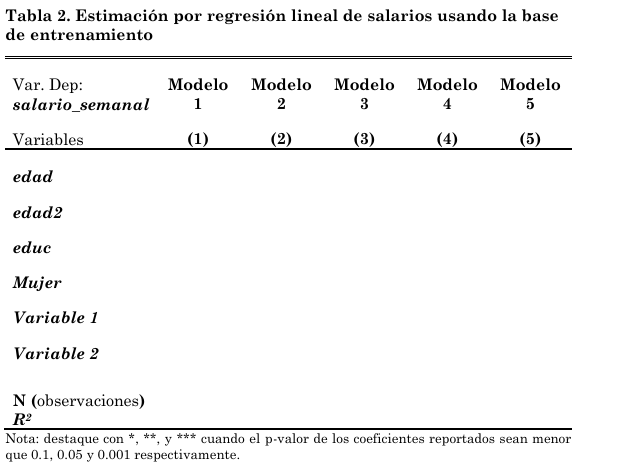

#3.
Enfoque de Validación: Ahora para cada modelo estime el salario
predicho de testeo (salario_semanal_test sombrerito) usando las
observaciones separadas de testeo y los coeficientes estimados en el
apartado anterior. Reporte y comente las siguientes métricas de testo
para cada modelo:

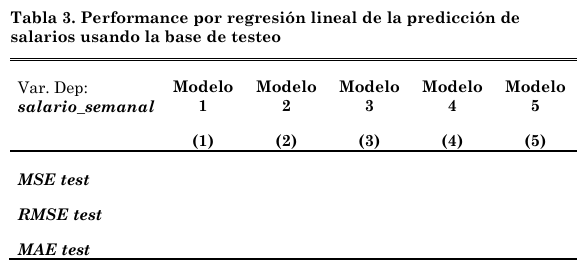

#4.
Opcional: Para el modelo de mejor performance, ilustre la predicción
de salarios (salario_semanal_hat_test) en un grafico de dispersión con
salario_semanal en el eje vertical y edad en el eje horizontal usando la
base de testeo. Comente brevemente el gráfico.


#C.
Métodos de Clasificación y Performance

#5.
Implementen los métodos de regresión logistica (logit) y vecinos
cercanos (KNN) con K=5 usando en la base de entrenamiento. Luego,
usando la base de testeo, reporte la matriz de confusión para p>0.5, la
curva ROC, los valores de AUC y de Accuracy de testeo de cada uno.
¿Cuál de los métodos predice mejor en cada año? Justifiquen
detalladamente utilizando las medidas de perfomance mencionadas
arribas.

#6.
Con el método que seleccionaron, predigan qué personas son
desocupadas dentro de la base norespondieron. ¿Qué proporción de
las personas que no respondieron pudieron identificar como
desocupadas?